In [405]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

데이터 로드 (q: 15분 단위, h: 1시간 단위)

In [406]:
generation_q = pd.read_csv("C:/Users/symply_jina/Desktop/seohyun/UIC4801/DATA_generation.csv")
generation_q['Time'] = pd.to_datetime(generation_q['Time'], format='%Y-%m-%d %H:%M')

In [407]:
generation_q['Hour'] = generation_q['Time'].dt.floor('H')    # 시간으로 그룹화
generation_h = generation_q.groupby('Hour').sum(numeric_only=True)  # 각 시간대별로 합계 계산

In [408]:
demand_q = pd.read_csv("C:/Users/symply_jina/Desktop/seohyun/UIC4801/DATA_demand.csv")
demand_q['Time'] = pd.to_datetime(demand_q['Time'], format='%Y-%m-%d %H:%M')

demand_q['Hour'] = demand_q['Time'].dt.floor('H')    # 시간으로 그룹화
demand_h = demand_q.groupby('Hour').sum(numeric_only=True)  # 각 시간대별로 합계 계산

In [409]:
price_q = pd.read_csv("C:/Users/symply_jina/Desktop/seohyun/UIC4801/DATA_price.csv")
price_q['Time'] = pd.to_datetime(price_q['Time'], format='%Y-%m-%d %H:%M')

set 설정

In [410]:
I = list(range(len(generation_q.columns) - 2))
T = list(generation_q['Time'].dt.hour.unique())

In [411]:
S = list(range(20))
prob = {s: 1 / len(S) for s in S}

Generation (randomized) 

In [412]:
# random=0.5

In [413]:
generation_avg = {
    (i, t): generation_h[generation_h.index.hour == t].mean()[i] for i in I for t in T
}   

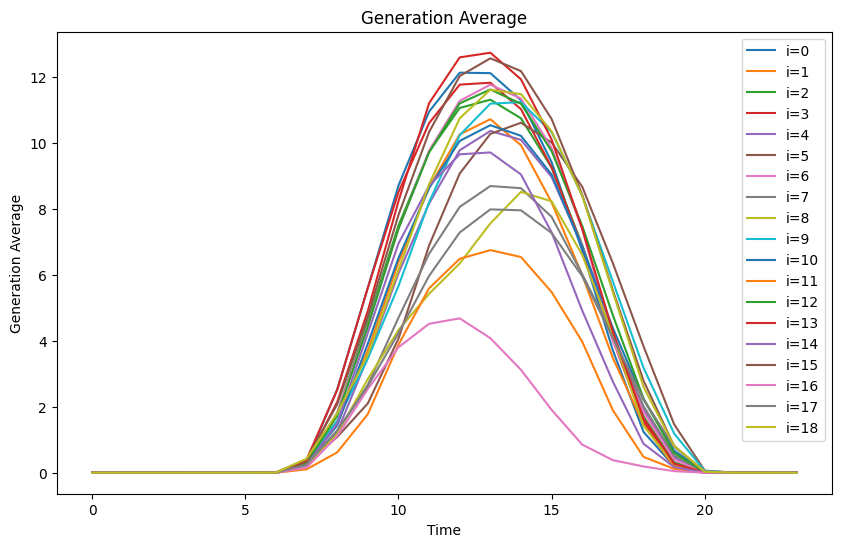

In [414]:
plt.figure(figsize=(10, 6))
for i in I:
    plt.plot(T, [generation_avg[(i, t)] for t in T], label=f'i={i}')
plt.title('Generation Average')
plt.xlabel('Time')
plt.ylabel('Generation Average')
plt.legend()
plt.show()

In [415]:
# # Low randomness
# np.random.seed(7)
# noise_factors = {(i, t, s): np.random.uniform(0.8, 1.2) for i in I for t in T for s in S}
# generation_r = {
#     (i, t, s): generation_avg[(i, t)]*noise_factors[(i, t, s)] for i in I for t in T for s in S
# }

# # medium randomness 
# np.random.seed(7)
# noise_factors = {(i, t, s): np.random.uniform(0.5, 1.5) for i in I for t in T for s in S}
# generation_r = {
#     (i, t, s): generation_avg[(i, t)]*noise_factors[(i, t, s)] for i in I for t in T for s in S
# }

# high randomness   
np.random.seed(7)
noise_factors = {(i, t, s): np.random.uniform(0.2, 1.8) for i in I for t in T for s in S}
generation_r = {
    (i, t, s): generation_avg[(i, t)]*noise_factors[(i, t, s)] for i in I for t in T for s in S
}

# print(noise_factors)

In [416]:
print(generation_r)

{(0, 0, 0): 2.8414802927524045e-05, (0, 0, 1): 0.00012772990733208412, (0, 0, 2): 7.952559891461599e-05, (0, 0, 3): 0.00011976144099137014, (0, 0, 4): 0.00015568772509058897, (0, 0, 5): 9.365289655765902e-05, (0, 0, 6): 8.83773322952329e-05, (0, 0, 7): 2.7813902440260045e-05, (0, 0, 8): 5.553418152013262e-05, (0, 0, 9): 8.82025929932407e-05, (0, 0, 10): 0.00011351761479493387, (0, 0, 11): 0.0001310921510687601, (0, 0, 12): 7.141393747893892e-05, (0, 0, 13): 2.6950796144088312e-05, (0, 0, 14): 5.8315784318761176e-05, (0, 0, 15): 0.0001460335850633274, (0, 0, 16): 4.776332442859521e-05, (0, 0, 17): 8.146144250095078e-05, (0, 0, 18): 0.00014908420310788604, (0, 0, 19): 2.1158378639435425e-05, (0, 1, 0): 0.00030182803479672293, (0, 1, 1): 0.0004472534055953291, (0, 1, 2): 0.00014780584348100622, (0, 1, 3): 0.00028017151412601554, (0, 1, 4): 0.00043019695516949784, (0, 1, 5): 0.00010739837739738177, (0, 1, 6): 0.0002697393521669914, (0, 1, 7): 0.00036417012148255154, (0, 1, 8): 0.0003303091

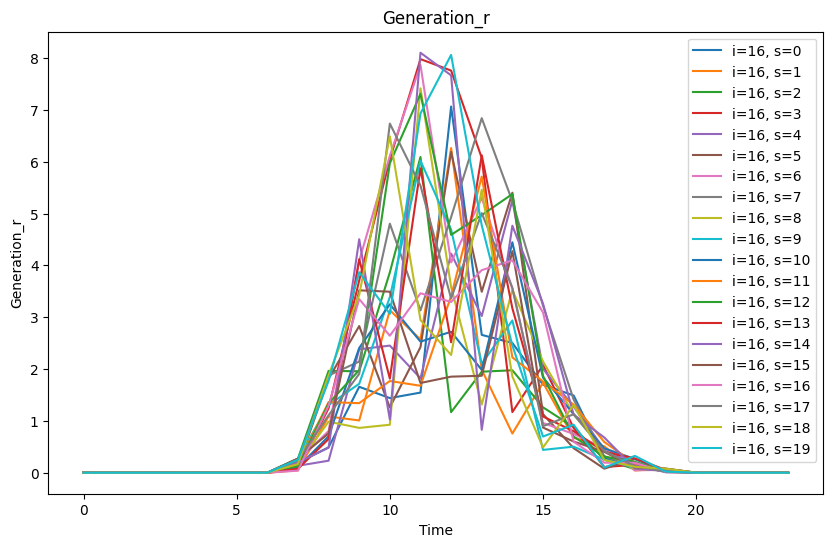

In [417]:
plt.figure(figsize=(10, 6))
for i in I[16:17]:
    for s in S:
        plt.plot(T, [generation_r[(i, t, s)] for t in T], label=f'i={i}, s={s}')
plt.title('Generation_r')
plt.xlabel('Time')
plt.ylabel('Generation_r')
plt.legend()
plt.show()


Demand (randomized)

In [418]:
demand_avg = {
    (i, t): demand_h[demand_h.index.hour == t].mean()[i] for i in I for t in T
}

c:\Users\symply_jina\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\symply_jina\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


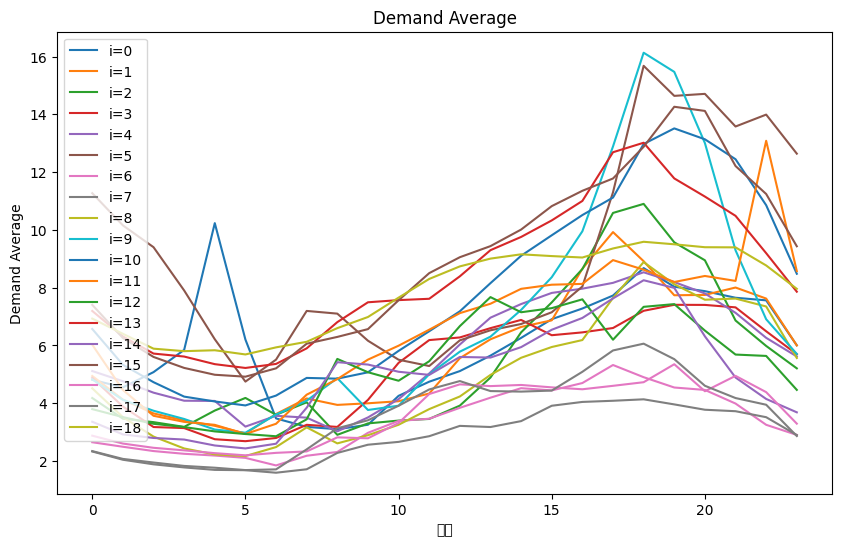

In [419]:
plt.figure(figsize=(10, 6))
for i in I:
    plt.plot(T, [demand_avg[(i, t)] for t in T], label=f'i={i}')
plt.title('Demand Average')
plt.xlabel('시간')
plt.ylabel('Demand Average')
plt.legend()
plt.show()

In [420]:
# # low randomness
# np.random.seed(17)
# noise_factors = {(i, t, s): np.random.uniform(0.8, 1.2) for i in I for t in T for s in S}
# demand_r = {
#     (i, t, s): demand_avg[(i, t)]*noise_factors[(i, t, s)] for i in I for t in T for s in S
# }

# # medium randomness
# np.random.seed(17)
# noise_factors = {(i, t, s): np.random.uniform(0.5, 1.5) for i in I for t in T for s in S}
# demand_r = {
#     (i, t, s): demand_avg[(i, t)]*noise_factors[(i, t, s)] for i in I for t in T for s in S
# }

# high randomness
np.random.seed(17)
noise_factors = {(i, t, s): np.random.uniform(0.2, 1.8) for i in I for t in T for s in S}
demand_r = {
    (i, t, s): demand_avg[(i, t)]*noise_factors[(i, t, s)] for i in I for t in T for s in S
}

# print(noise_factors)

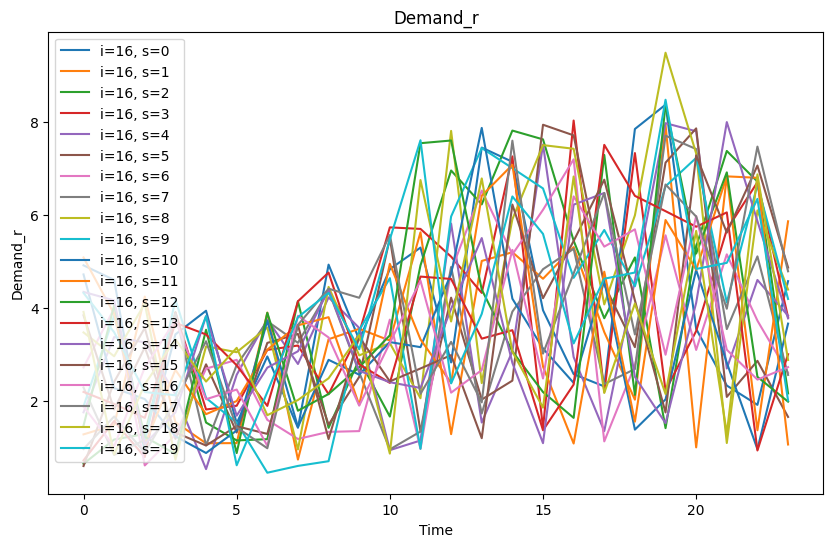

In [421]:
plt.figure(figsize=(10, 6))
for i in I[16:17]:
    for s in S:
        plt.plot(T, [demand_r[(i, t, s)] for t in T], label=f'i={i}, s={s}')
plt.title('Demand_r')
plt.xlabel('Time')
plt.ylabel('Demand_r')
plt.legend()
plt.show()

Residual = generation - demand

In [422]:
residual = {(i, t, s): generation_r[(i, t, s)] - demand_r[(i, t, s)] for i in I for t in T for s in S}

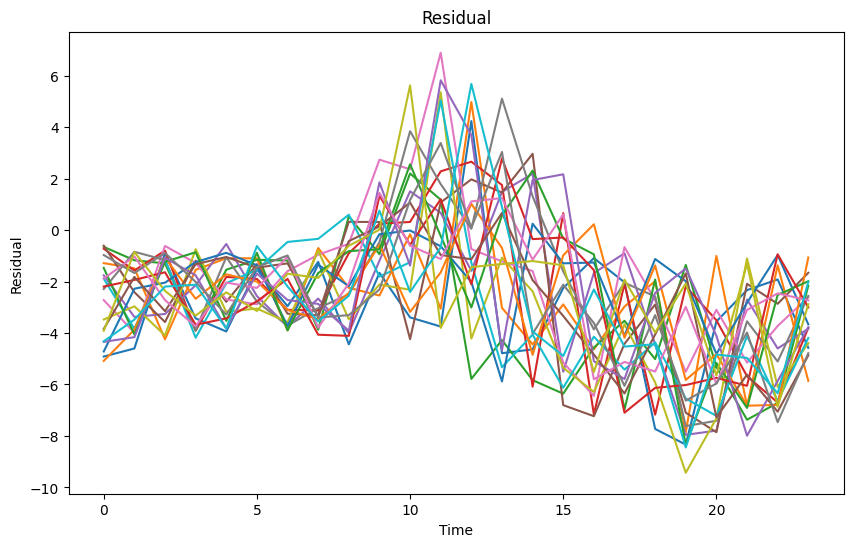

In [423]:
plt.figure(figsize=(10, 6))
for i in I[16:17]:
    for s in S:
        plt.plot(T, [residual[(i, t, s)] for t in T], label=f'i={i}, s={s}')
plt.title('Residual')
plt.xlabel('Time')
plt.ylabel('Residual')
# plt.legend()
plt.show()

In [424]:
R = {
    (i, t, s): max(0, residual[(i, t, s)])
    for i in I for t in T for s in S
}

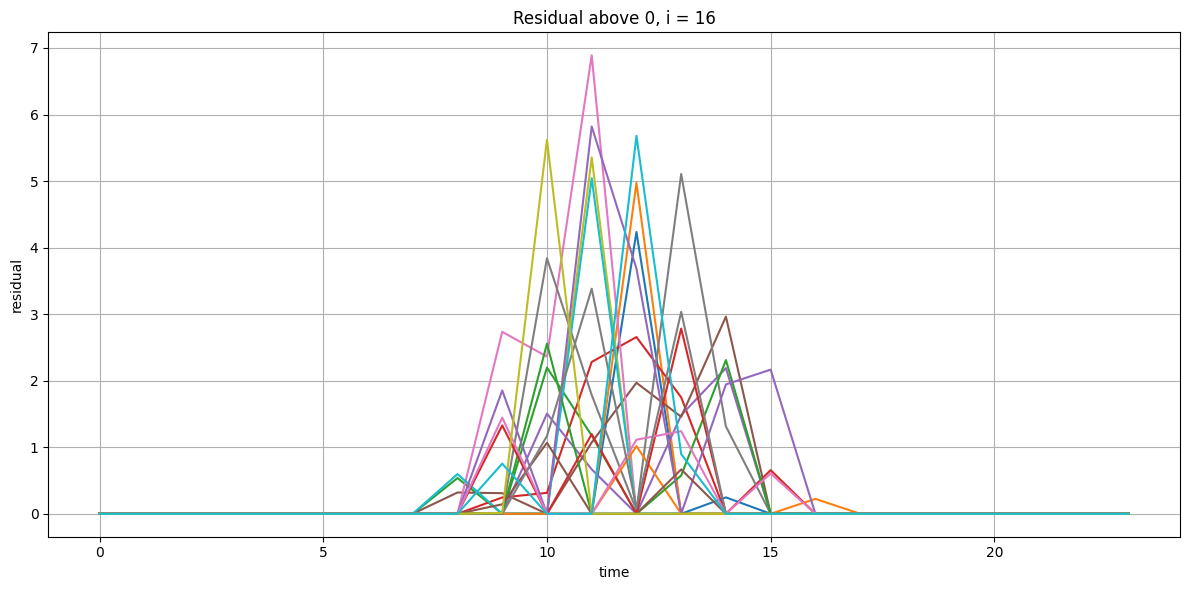

In [425]:
plt.figure(figsize=(12, 6))

for i in I[16:17]:
    for s in S:
        plt.plot([t for t in T], [R[i, t, s] for t in T])

plt.title(f'Residual above 0, i = {i}')
plt.xlabel('time')
plt.ylabel('residual')
plt.grid(True)
# plt.legend()
plt.tight_layout()
plt.show()

In [426]:
R_sum = {(i, t): sum(R[i, t, s] for s in S) / len(S) for i in I for t in T}
R_df = pd.DataFrame({i: {t: R_sum[i, t] for t in T} for i in I})
R_df.to_csv('result_R.csv', index=False)

Price 설정

In [427]:
unique_days = generation_q['Time'].dt.normalize().unique()
days = len(unique_days)
S = list(range(min(len(S), days)))

In [428]:
price_q['Hour'] = price_q['Time'].dt.floor('H')    # 시간으로 그룹화
price_h = price_q.groupby('Hour').mean(numeric_only=True)  # 각 시간대별로 평균 계산

price = price_h.iloc[:len(S)*len(T)]

In [429]:
price

,Price
Hour,
2018-01-01 00:00:00,29.3600
2018-01-01 01:00:00,27.5250
2018-01-01 02:00:00,27.2375
2018-01-01 03:00:00,24.8750
2018-01-01 04:00:00,23.2650
...,...
2018-01-20 19:00:00,18.6175
2018-01-20 20:00:00,18.1225
2018-01-20 21:00:00,17.3250


In [430]:
# 전일 시장 가격 (Day-ahead) 및 실시간 시장 가격 (Real-time)
P_DA = {t: sum(price['Price'].iloc[t + s * len(T)] for s in S) / len(S) * 1.2 for t in T}
P_RT = {(t, s): price['Price'].iloc[t + s * len(T)] for t in T for s in S}

# 패널티 비용 계산
P_PN = {t: sum(price['Price'].iloc[t + s * len(T)] for s in S) / len(S) * 2 for t in T}

In [431]:
# P_DA
# P_RT
# P_PN

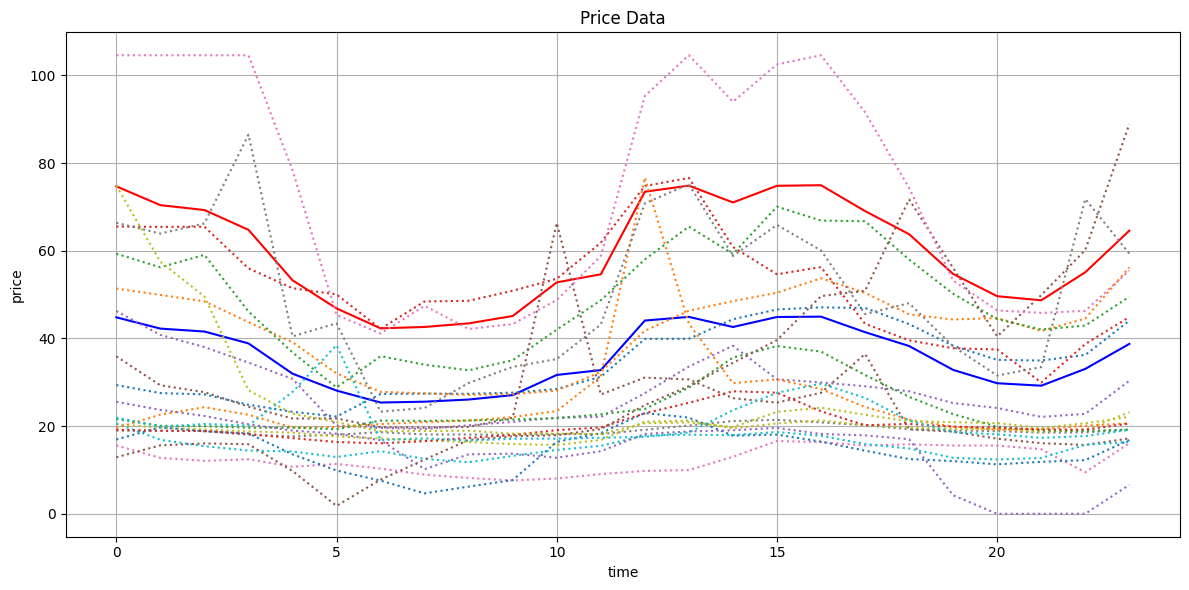

In [432]:
plt.figure(figsize=(12, 6))
plt.plot([t for t in T], [P_DA[t] for t in T], 'b-', label='DA price')
plt.plot([t for t in T], [P_PN[t] for t in T], 'r-', label=f'Penalty price')

for s in S:
    plt.plot([t for t in T], [P_RT[t, s] for t in T], ':', label=f'RT price (s={s})')

plt.title('Price Data')
plt.xlabel('time')
plt.ylabel('price')
plt.grid(True)
# plt.legend()
plt.tight_layout()
plt.show()

In [433]:
pd.DataFrame(list(P_DA.items()), columns=['time', 'price']).to_csv('result_P_DA.csv', index=False)
pd.DataFrame(list(P_PN.items()), columns=['time', 'price']).to_csv('result_P_PN.csv', index=False)
pd.DataFrame(list(P_RT.items()), columns=['time', 'price']).to_csv('result_P_RT.csv', index=False)


모델 DER only

In [434]:
x_DA_1 = {(i, t): cp.Variable(pos=True) for i in I for t in T}
y_plus_1 = {(i, t, s): cp.Variable(pos=True) for i in I for t in T for s in S}
y_minus_1 = {(i, t, s): cp.Variable(pos=True) for i in I for t in T for s in S}

In [435]:
# 목적함수
obj_case1 = sum(
    P_DA[t] * x_DA_1[i, t] for i in I for t in T
) + sum(
    prob[s] * (P_RT[t, s] * y_plus_1[i, t, s] - P_PN[t] * y_minus_1[i, t, s])
    for i in I for t in T for s in S
)

In [436]:
# 제약조건
constraints_case1 = []
for i in I:
    for t in T:
        for s in S:
            constraints_case1.append(R[i, t, s] - x_DA_1[i, t] == y_plus_1[i, t, s] - y_minus_1[i, t, s])

In [437]:
for i in I:
    for t in T:
        for s in S:
            constraints_case1.append(R[i,t,s] >= y_plus_1[i, t, s])

In [438]:
# y+와 y-의 동시 발생 방지
M = max(R[i,t,s] for i in I for t in T for s in S)
z_case1 = {(i, t, s): cp.Variable(boolean=True) for i in I for t in T for s in S}
for i in I:
    for t in T:
        for s in S:
            constraints_case1.append(y_plus_1[i, t, s] <= M * z_case1[i, t, s])
            constraints_case1.append(y_minus_1[i, t, s] <= M * (1 - z_case1[i, t, s]))

In [439]:
prob_case1 = cp.Problem(cp.Maximize(obj_case1), constraints_case1)

# 풀이 실행
prob_case1.solve(solver='GUROBI', IntFeasTol=1e-9, TimeLimit=60*30)

# 결과 출력
print("Case 1 최적해:")
print(f"총 이익: {prob_case1.value}")

c:\Users\symply_jina\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\problems\problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


Case 1 최적해:
총 이익: 17284.27765461547


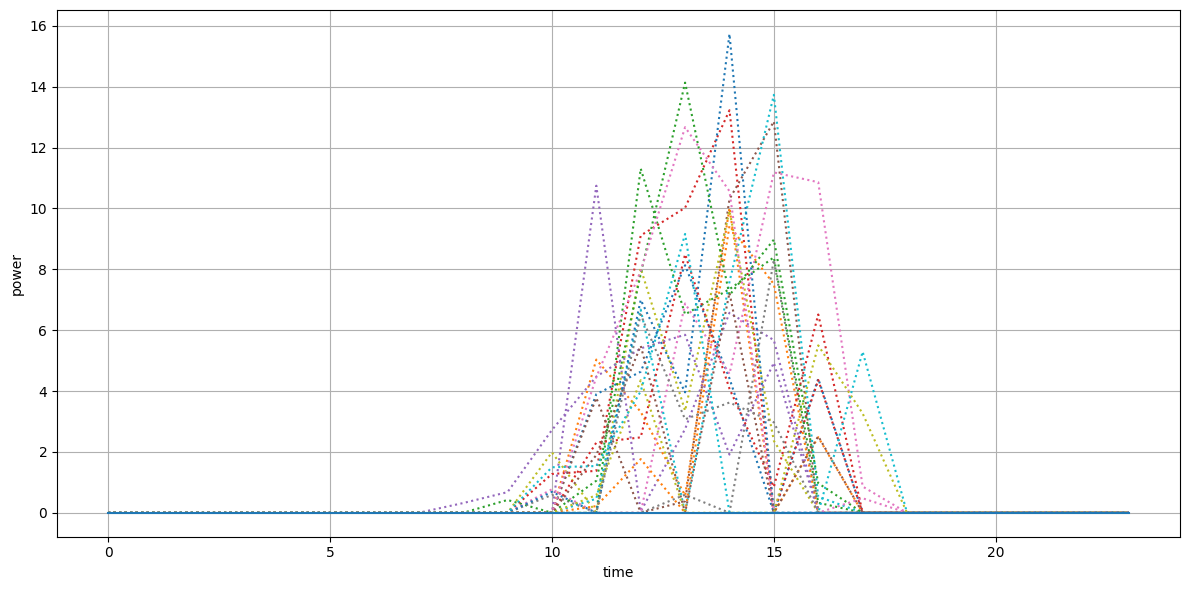

In [440]:
plt.figure(figsize=(12, 6))

i = 5
for s in S:
    plt.plot([t for t in T], [R[i,t,s] for t in T], ':', label=f'Scenario {s} Residual')
plt.plot([t for t in T], [x_DA_1[i,t].value for t in T], '-', label=f'Case 1 commitment')
    # plt.plot([t for t in T], [y_plus_1[i,t,s].value for t in T], 'b:', label=f'Scenario {s} Case 1 y+')

plt.xlabel('time')
plt.ylabel('power')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [441]:
# # 모든 i에 대해서

# plt.figure(figsize=(12, 6))

# for s in S:
#     for i in I:
#         plt.plot([t for t in T], [R[i,t,s] for t in T], ':', label=f'DER {i} 시나리오 {s} Residual')
#         plt.plot([t for t in T], [x_DA_1[i,t].value for t in T], label=f'DER {i} 시나리오 {s} Case 1 commitment')
#         # plt.plot([t for t in T], [sum(y_plus_1[i,t,s].value for s in S)/len(S) for t in T], 'b:', label=f'DER {i} 시나리오 {s} Case 1 y+')

# plt.xlabel('time')
# plt.ylabel('power')
# # plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [442]:
# Day-ahead 수익 비교
total_da_profit_obj = 0
for i in I:
    for t in T:
        total_da_profit_obj += P_DA[t] * x_DA_1[i,t].value

# Real-time 수익 비교
total_rt_profit_obj = 0
for i in I:
    for t in T:
        for s in S:
            rt_profit_obj = P_RT[t, s] * y_plus_1[i, t, s].value
            total_rt_profit_obj += prob[s] * rt_profit_obj

# 패널티 비용 비교
total_penalty_cost_obj = 0
for i in I:
    for t in T:
        for s in S:
            penalty_cost_obj = P_PN[t] * y_minus_1[i, t, s].value
            total_penalty_cost_obj += prob[s] * penalty_cost_obj

# 총 시스템 이익 (목적 함수 기반)
total_system_profit_obj = total_da_profit_obj + total_rt_profit_obj - total_penalty_cost_obj

# 결과 출력
print(f"총 Day-ahead 수익 (_obj): {total_da_profit_obj:.2f}")
print(f"총 Real-time 수익 (_obj): {total_rt_profit_obj:.2f}")
print(f"총 Penalty 비용 (_obj): {total_penalty_cost_obj:.2f}")
print(f"목적 함수 기반 총 이익 (_obj): {total_system_profit_obj:.2f}")

총 Day-ahead 수익 (_obj): 1531.63
총 Real-time 수익 (_obj): 16169.93
총 Penalty 비용 (_obj): 417.28
목적 함수 기반 총 이익 (_obj): 17284.28


In [443]:
print("Case 1 최적해:")
print(f"총 이익: {prob_case1.value}")

Case 1 최적해:
총 이익: 17284.27765461547


In [444]:
total_x_da_1 = {t: sum(x_DA_1[i,t].value for i in I) for t in T}
total_x_da_1_df = pd.DataFrame({'total_x_da_1': total_x_da_1})
total_x_da_1_df.to_csv('result_total_X_DA.csv', index=False)

In [445]:
print(f"P_DA = {P_DA[10]}, P_PN = {P_PN[10]}")
for s in S:
    print(f"P_RT {s} = {P_RT[10,s]}")

P_DA = 31.665312000000004, P_PN = 52.77552000000001
P_RT 0 = 28.447499999999998
P_RT 1 = 28.0925
P_RT 2 = 41.995000000000005
P_RT 3 = 53.595
P_RT 4 = 21.93
P_RT 5 = 66.33770000000001
P_RT 6 = 8.0425
P_RT 7 = 18.1675
P_RT 8 = 15.69
P_RT 9 = 14.5625
P_RT 10 = 16.4025
P_RT 11 = 23.42
P_RT 12 = 21.815
P_RT 13 = 19.072499999999998
P_RT 14 = 12.7875
P_RT 15 = 17.925
P_RT 16 = 48.7475
P_RT 17 = 35.29
P_RT 18 = 18.2925
P_RT 19 = 17.1425


In [446]:
for i in I: 
    for t in T:
        for s in S:
            if y_plus_1[i, t, s].value > 0.000001 and y_minus_1[i, t, s].value > 0.000001:
                print(f"DER {i}, 시간 {t}, 시나리오 {s}: y+와 y-가 동시에 발생했습니다.")
                print(z_case1[i,t,s].value)
                break
else:
    print(f"y+와 y-가 동시에 발생하지 않았습니다.")

y+와 y-가 동시에 발생하지 않았습니다.


In [447]:
for i in I:
    for t in T[15:16]:
        print(f"시간 {t}, DER {i}: x = {x_DA_1[i, t].value}")
        for s in S:
            print(f"발전량: {R[i,t,s]}, 시나리오 {s}: y+ = {y_plus_1[i, t, s].value}, y- = {y_minus_1[i, t, s].value}")

시간 15, DER 0: x = 0.0
발전량: 5.847513198919813, 시나리오 0: y+ = 5.847513198919813, y- = 0.0
발전량: 0, 시나리오 1: y+ = 0.0, y- = 0.0
발전량: 0, 시나리오 2: y+ = 0.0, y- = 0.0
발전량: 8.229209679587822, 시나리오 3: y+ = 8.229209679587822, y- = 0.0
발전량: 0, 시나리오 4: y+ = 0.0, y- = 0.0
발전량: 2.403051355755207, 시나리오 5: y+ = 2.403051355755207, y- = 0.0
발전량: 0, 시나리오 6: y+ = 0.0, y- = 0.0
발전량: 7.207640856800721, 시나리오 7: y+ = 7.207640856800721, y- = 0.0
발전량: 3.4334723951379953, 시나리오 8: y+ = 3.4334723951379953, y- = 0.0
발전량: 0, 시나리오 9: y+ = 0.0, y- = 0.0
발전량: 4.5286898755905804, 시나리오 10: y+ = 4.5286898755905804, y- = 0.0
발전량: 10.682371007870811, 시나리오 11: y+ = 10.682371007870811, y- = 0.0
발전량: 13.210150309417134, 시나리오 12: y+ = 13.210150309417134, y- = 0.0
발전량: 11.980187611606585, 시나리오 13: y+ = 11.980187611606585, y- = 0.0
발전량: 10.043085438966083, 시나리오 14: y+ = 10.043085438966083, y- = 0.0
발전량: 0, 시나리오 15: y+ = 0.0, y- = 0.0
발전량: 0, 시나리오 16: y+ = 0.0, y- = 0.0
발전량: 2.1883889947125406, 시나리오 17: y+ = 2.1883889947125406, y- = 

In [448]:
sum_x = 0
for t in T:
    time_sum = sum(x_DA_1[i,t].value for i in I)
    print(f"시간 {t}: {time_sum}")
    sum_x += time_sum
print(f"총 발전량: {sum_x}")


시간 0: 0.0
시간 1: 0.0
시간 2: 0.0
시간 3: 0.0
시간 4: 0.0
시간 5: 0.0
시간 6: 0.0
시간 7: 0.0
시간 8: 0.0
시간 9: 0.5147986034749454
시간 10: 1.1537325783348154
시간 11: 7.862758020877618
시간 12: 11.46145621092199
시간 13: 10.420234945643287
시간 14: 4.766874730895881
시간 15: 0.4364041230224416
시간 16: 0.6193598667743274
시간 17: 0.0
시간 18: 0.0
시간 19: 0.0
시간 20: 0.0
시간 21: 0.0
시간 22: 0.0
시간 23: 0.0
총 발전량: 37.2356190799453


In [449]:
# 모든 der의 profit 합계 계산
total_der_profit = 0
der_profit = {}
for i in I:
    # 각 der i의 profit 합계 계산
    der_profit[i] = sum(P_DA[t] * x_DA_1[i,t].value + sum(prob[s] * (P_RT[t,s] * y_plus_1[i,t,s].value - P_PN[t] * y_minus_1[i,t,s].value) for s in S) for t in T)
    total_der_profit += der_profit[i]

print("\nder_profit:")
for i, value in der_profit.items():
    print(f"{i}: {value:.2f}")

print(f"\n모든 der의 profit 합계: {total_der_profit:.2f}")



der_profit:
0: 1204.52
1: 872.55
2: 1237.50
3: 1128.51
4: 724.24
5: 963.51
6: 1732.71
7: 1098.66
8: 768.93
9: 930.68
10: 851.58
11: 263.84
12: 1246.71
13: 902.07
14: 883.50
15: 789.79
16: 183.66
17: 736.08
18: 765.24

모든 der의 profit 합계: 17284.28


In [450]:
der_profit_value = pd.DataFrame({'der_profit_value': der_profit})
der_profit_value.to_csv('result_der_profit.csv', index=False)

In [451]:
only_value = pd.DataFrame({'only_value': [prob_case1.value]})
only_value.to_csv('result_only_value.csv', index=False)